# Provided Adaline Sample Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [2]:
# read Iris data set

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
1 [4.9 3.0 1.4 0.2 'Iris-setosa']
2 [4.7 3.2 1.3 0.2 'Iris-setosa']
3 [4.6 3.1 1.5 0.2 'Iris-setosa']
4 [5.0 3.6 1.4 0.2 'Iris-setosa']
5 [5.4 3.9 1.7 0.4 'Iris-setosa']
6 [4.6 3.4 1.4 0.3 'Iris-setosa']
7 [5.0 3.4 1.5 0.2 'Iris-setosa']
8 [4.4 2.9 1.4 0.2 'Iris-setosa']
9 [4.9 3.1 1.5 0.1 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
11 [4.8 3.4 1.6 0.2 'Iris-setosa']
12 [4.8 3.0 1.4 0.1 'Iris-setosa']
13 [4.3 3.0 1.1 0.1 'Iris-setosa']
14 [5.8 4.0 1.2 0.2 'Iris-setosa']
15 [5.7 4.4 1.5 0.4 'Iris-setosa']
16 [5.4 3.9 1.3 0.4 'Iris-setosa']
17 [5.1 3.5 1.4 0.3 'Iris-setosa']
18 [5.7 3.8 1.7 0.3 'Iris-setosa']
19 [5.1 3.8 1.5 0.3 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
21 [5.1 3.7 1.5 0.4 'Iris-setosa']
22 [4.6 3.6 1.0 0.2 'Iris-setosa']
23 [5.1 3.3 1.7 0.5 'Iris-setosa']
24 [4.8 3.4 1.9 0.2 'Iris-setosa']
25 [5.0 3.0 1.6 0.2 'Iris-setosa']
26 [5.0 3.4 1.6 0.4 'Iris-setosa']
27 [5.2 3.5 1.5 0.2 'Iris-setosa']
28 [5.2 3.4 1.4 0.2 'Iris-seto

In [3]:
# get Iris classifications

IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [5]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


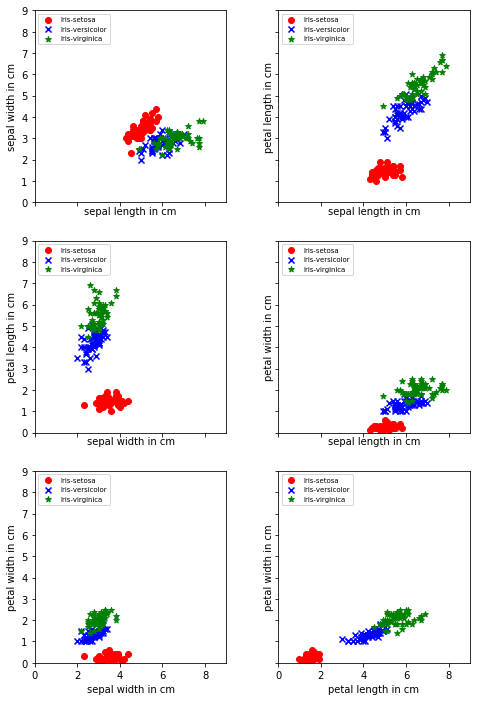

In [6]:
# plot classifications of all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)


i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], 
                          marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], 
                          marker=pltM[1], label=IC[1])
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], 
                          marker=pltM[2], label=IC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()

In [7]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))

In [8]:
# Define some helper functions to make later code more readable

def get_class_labels_and_features():
    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, len(fdx)))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        i += 1
    return (NC, NF)

def plot_adaline_eta(NF,NC):    
    plt.close('all')
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16,16))
    eta_to_use = 1
    for i in range(2):
        for j in range(2):
            eta_to_use = eta_to_use/10
            ada = AdalineGD(n_iter=10, eta=eta_to_use).fit(NF, NC)
            ax[i][j].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
            ax[i][j].set_xlabel('Epoch')
            ax[i][j].set_ylabel('log(Sum-squared-error)')
            ax[i][j].set_title('Adaline: eta = '+str(eta_to_use), fontsize ='medium')
    plt.show()

def standardize_inputs(NF,NC):
    NF_Std = np.copy(NF)
    for i in range(len(fdx)):
        NF_Std[:,i] = (NF[:,i] - NF[:,i].mean()) / NF[:,i].std()
    return NF_Std

def plot_adaline_eta_std(NF_Std,NC,itr = 50):
    plt.close('all')
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

    ada = AdalineGD(n_iter=itr, eta=0.003)
    ada.fit(NF_Std, NC)
    ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Sum-squared-error')
    ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
    ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Sum-squared-error')
    ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
    plt.show()
    
    return ada

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

# Assignment 2

In [9]:
# focus on classification of "versicolor" and "virginica", class indexes 1 and 2
# set to 1 and -1 in class array
cdx = np.array([1,2])

# Features:
    # 0 = sepal length in cm
    # 1 = sepal width in cm
    # 2 = petal length in cm
    # 3 = petal width in cm

# Cases:
    # Two features at a time:
        # sepal length (0) and sepal width (1)
        # sepal length (0) and petal length (2)
        # sepal length (0) and petal width (3)
        # sepal width (1) and petal length (2)
        # sepal width (1) and petal width (3)
        # petal length (2) and petal width (3)
    # Three features at a time:
        # sepal length (0), sepal width (1), and petal length (2)
        # sepal length (0), sepal width (1), and petal width (3)
        # sepal length (0), petal length (2), and petal width (3)
        # sepal width (1), petal length (2), and petal width (3)
    # All four features together:
        # sepal length (0), sepal width (1), petal length (2), and petal width (3)

In [10]:
acclist = []           # Case Num, Features Used, Accuracy
casenum = 0

## Two Feature Cases

### sepal length (0) and sepal width (1)

In [11]:
# focus on the features "sepal length" and "sepal width", feature indexes 0 and 1
fdx = np.array([0,1])
# get class labels and features
NC, NF = get_class_labels_and_features()

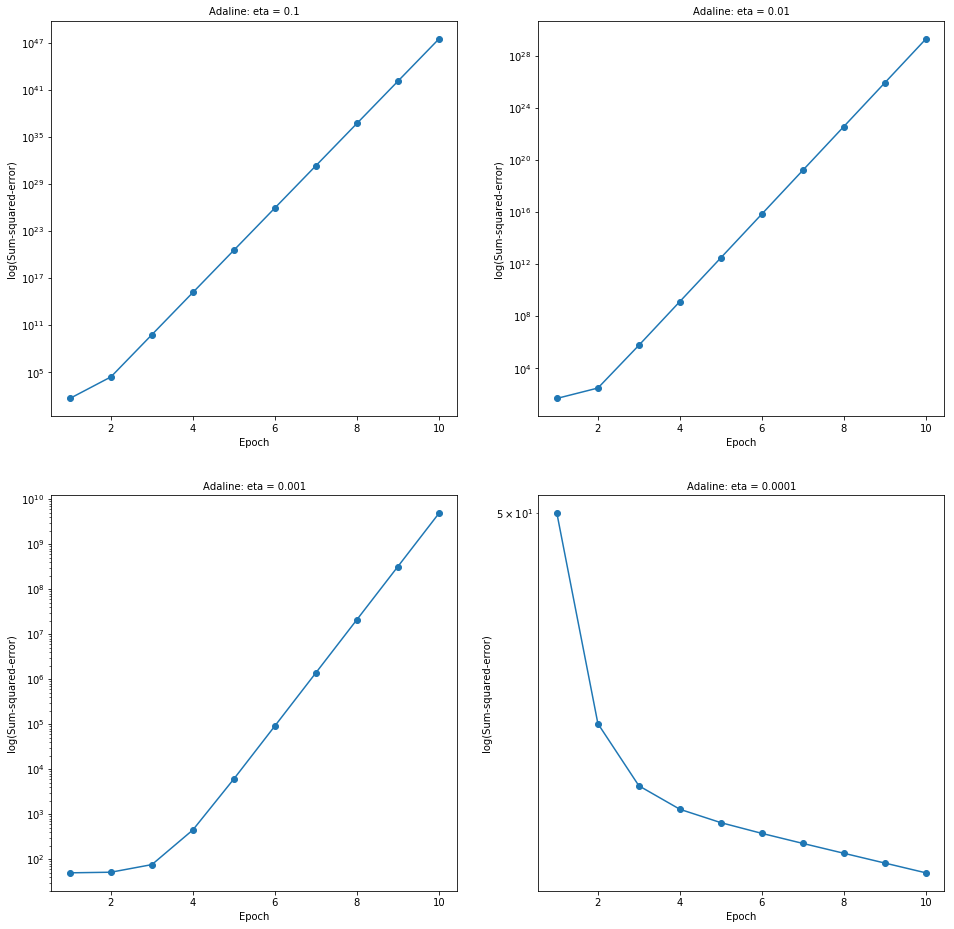

In [12]:
plot_adaline_eta(NF,NC)

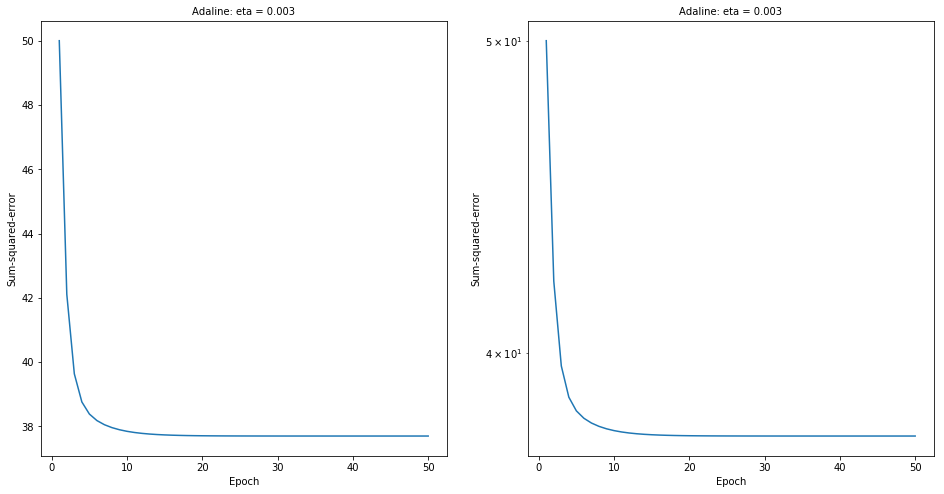

In [13]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,50)

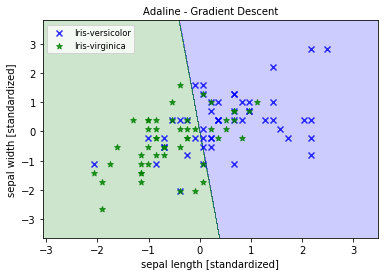

In [14]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [15]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.75


### sepal length (0) and petal length (2)

In [16]:
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])
# get class labels and features
NC, NF = get_class_labels_and_features()

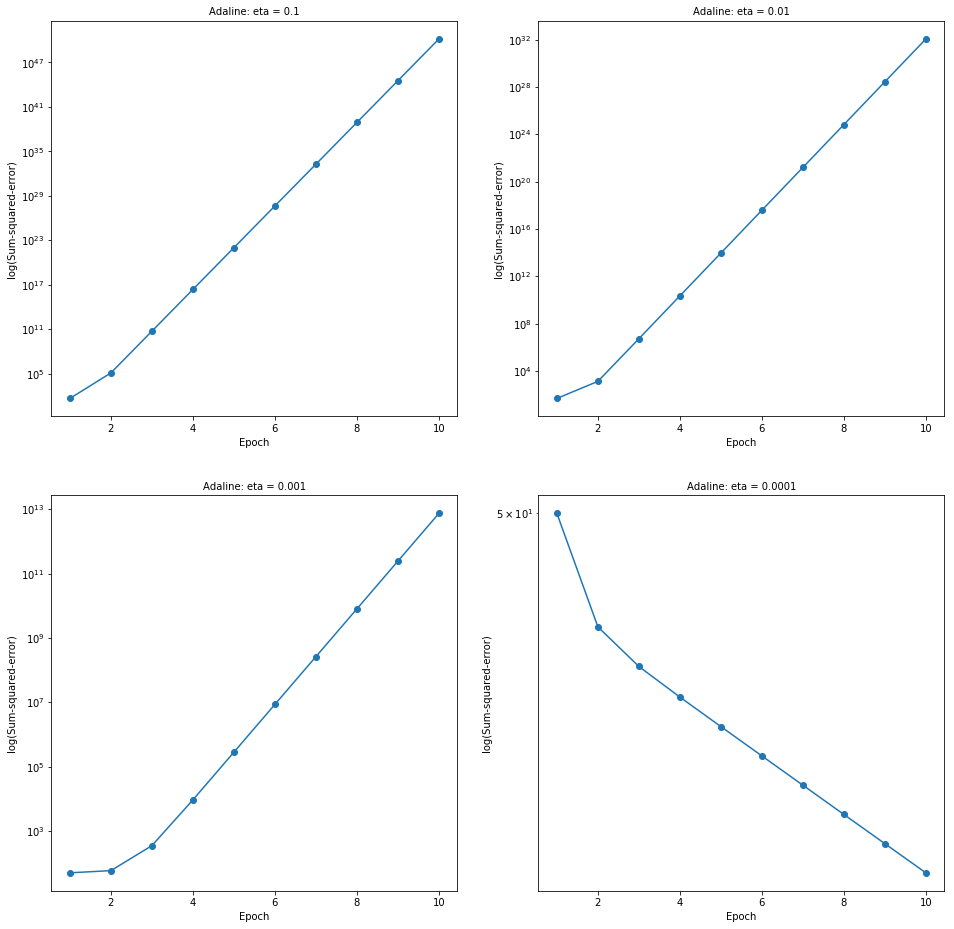

In [17]:
plot_adaline_eta(NF,NC)

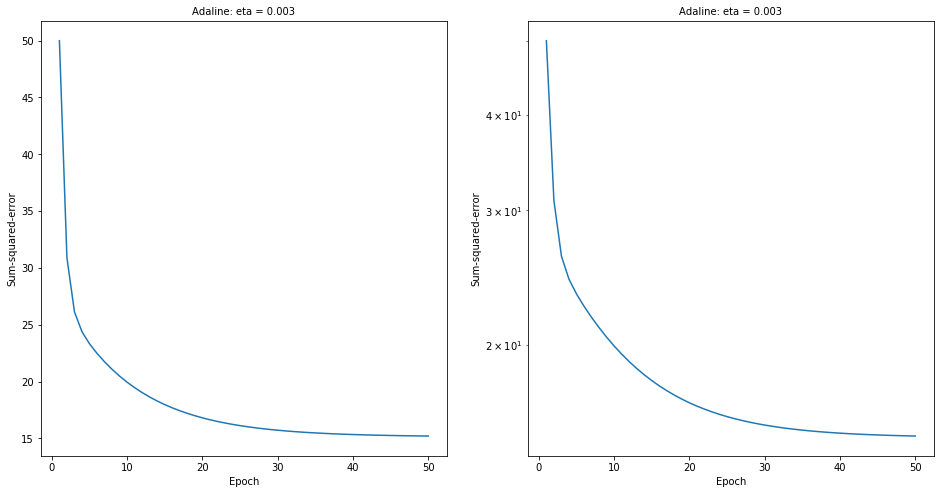

In [18]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,50)

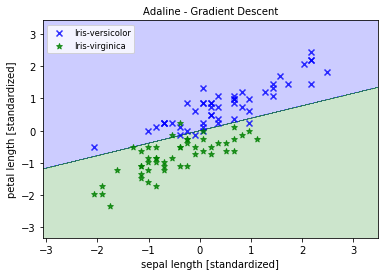

In [19]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [20]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.94


### sepal length (0) and petal width (3)

In [21]:
# focus on the features "sepal length" and "petal width", feature indexes 0 and 3
fdx = np.array([0,3])
# get class labels and features
NC, NF = get_class_labels_and_features()

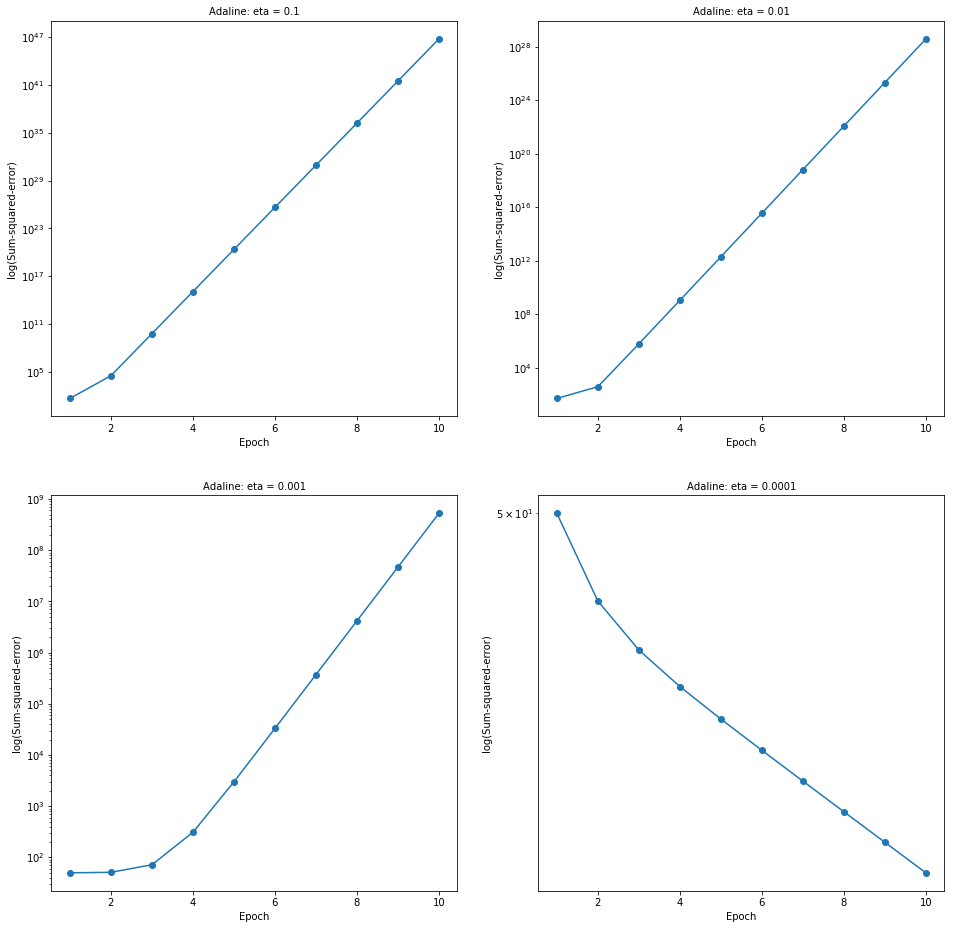

In [22]:
plot_adaline_eta(NF,NC)

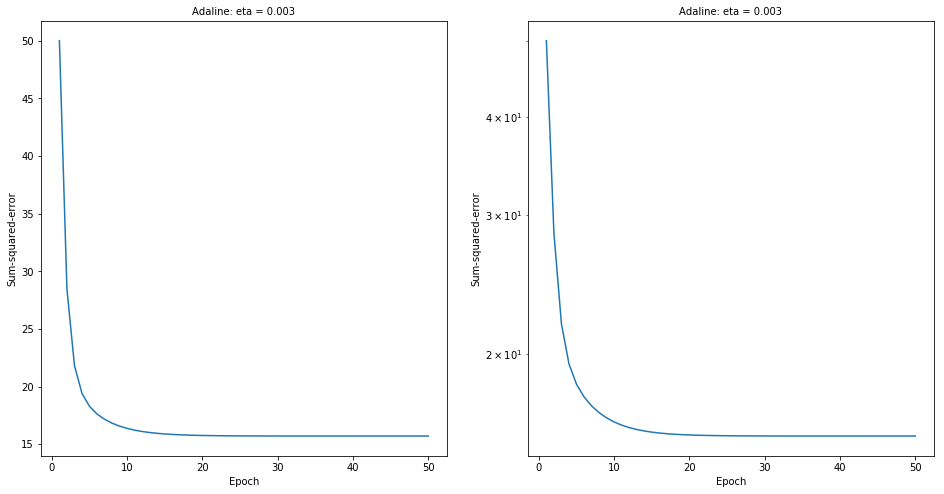

In [23]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,50)

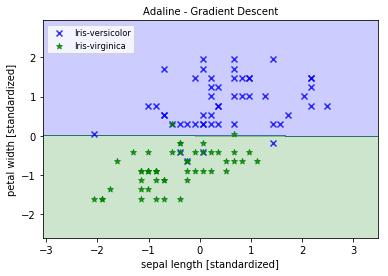

In [24]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [25]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.94


### sepal width (1) and petal length (2)

In [26]:
# focus on the features "sepal width" and "petal length", feature indexes 1 and 2
fdx = np.array([1,2])
# get class labels and features
NC, NF = get_class_labels_and_features()

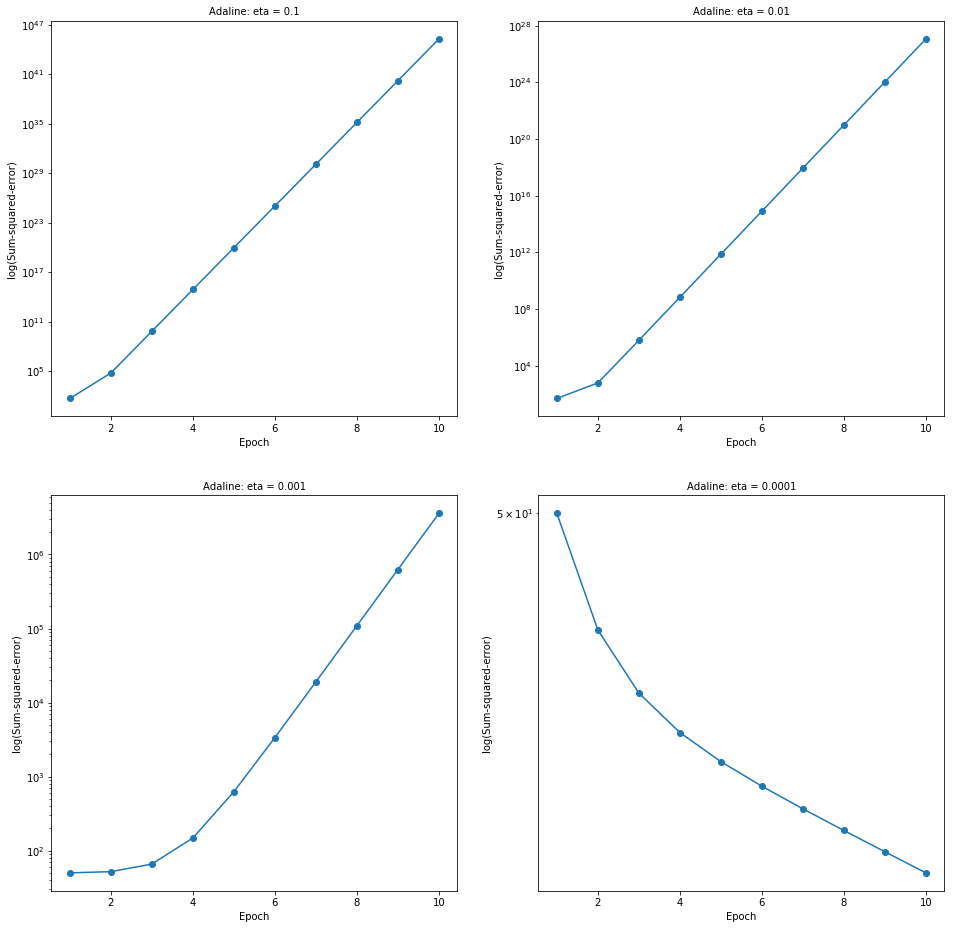

In [27]:
plot_adaline_eta(NF,NC)

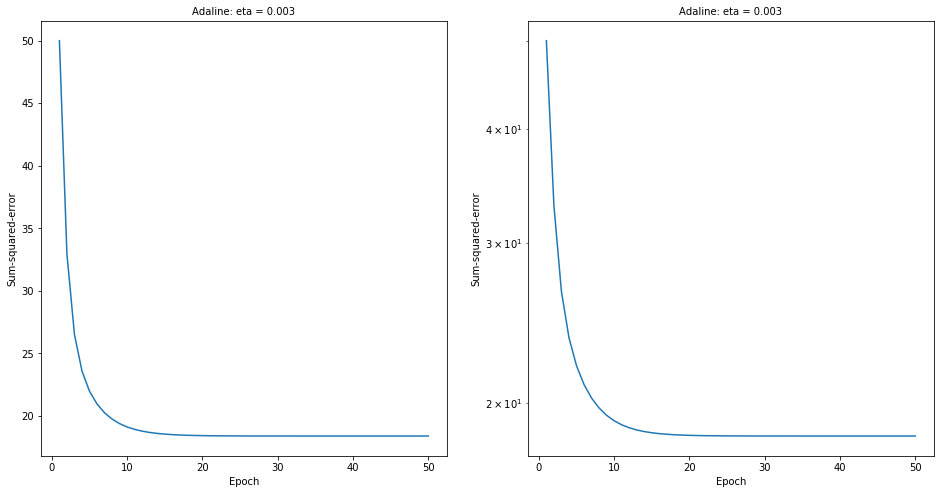

In [28]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,50)

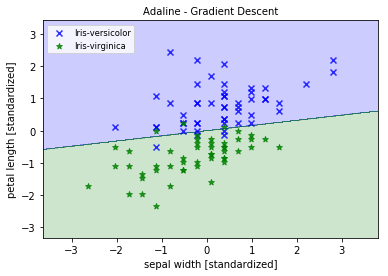

In [29]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [30]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.9299999999999999


### sepal width (1) and petal width (3)

In [31]:
# focus on the features "sepal width" and "petal width", feature indexes 1 and 3
fdx = np.array([1,3])
# get class labels and features
NC, NF = get_class_labels_and_features()

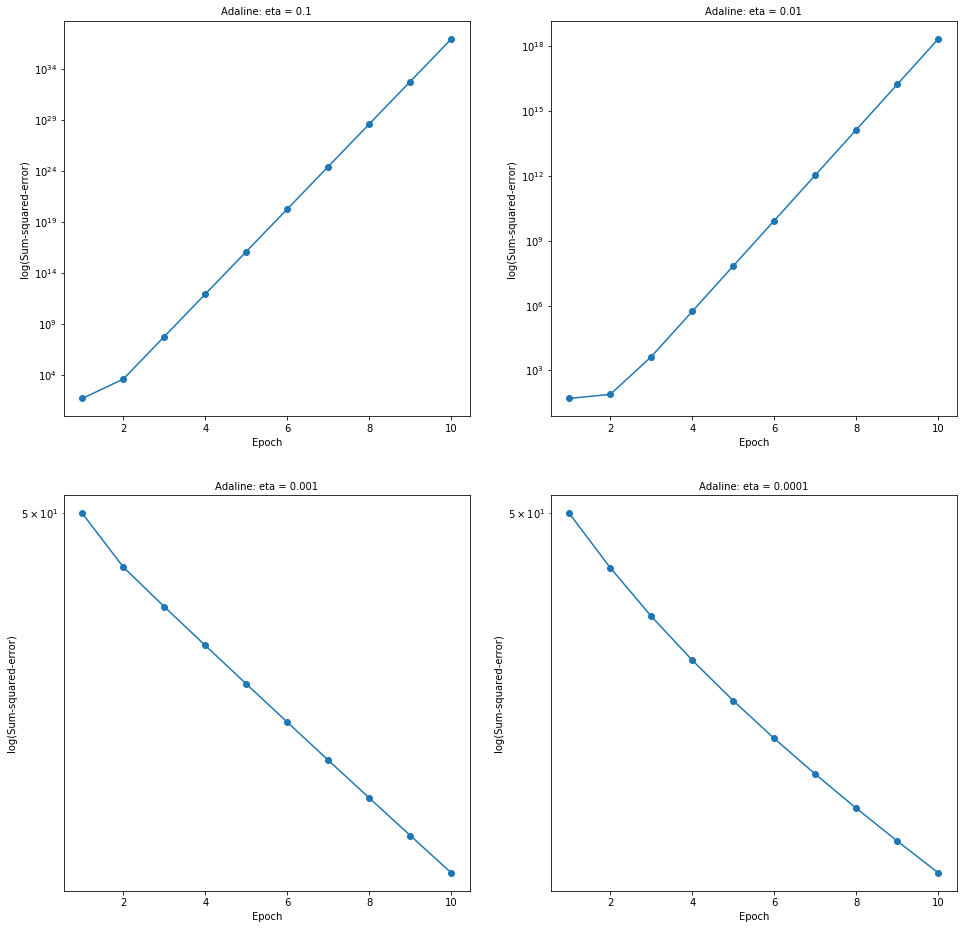

In [32]:
plot_adaline_eta(NF,NC)

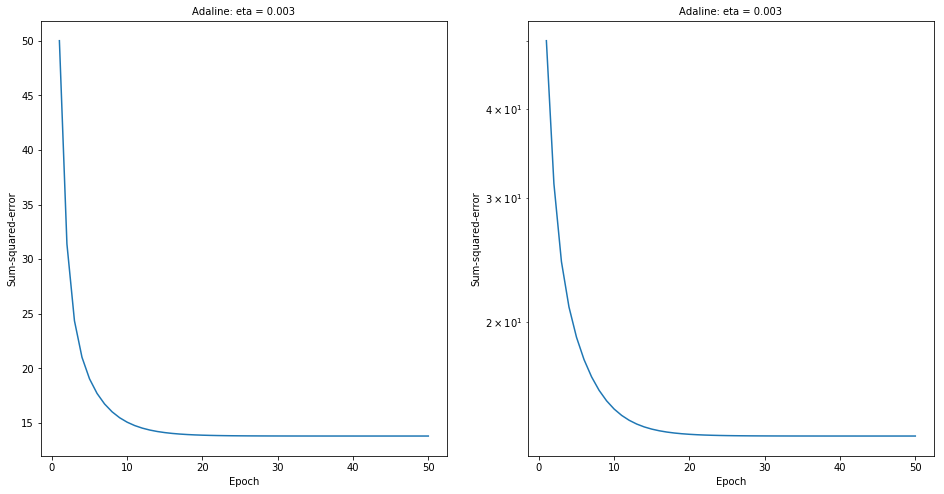

In [33]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,50)

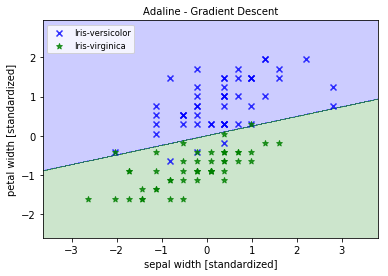

In [34]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [35]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.95


### petal length (2) and petal width (3)

In [36]:
# focus on the features "petal length" and "petal width", feature indexes 2 and 3
fdx = np.array([2,3])
# get class labels and features
NC, NF = get_class_labels_and_features()

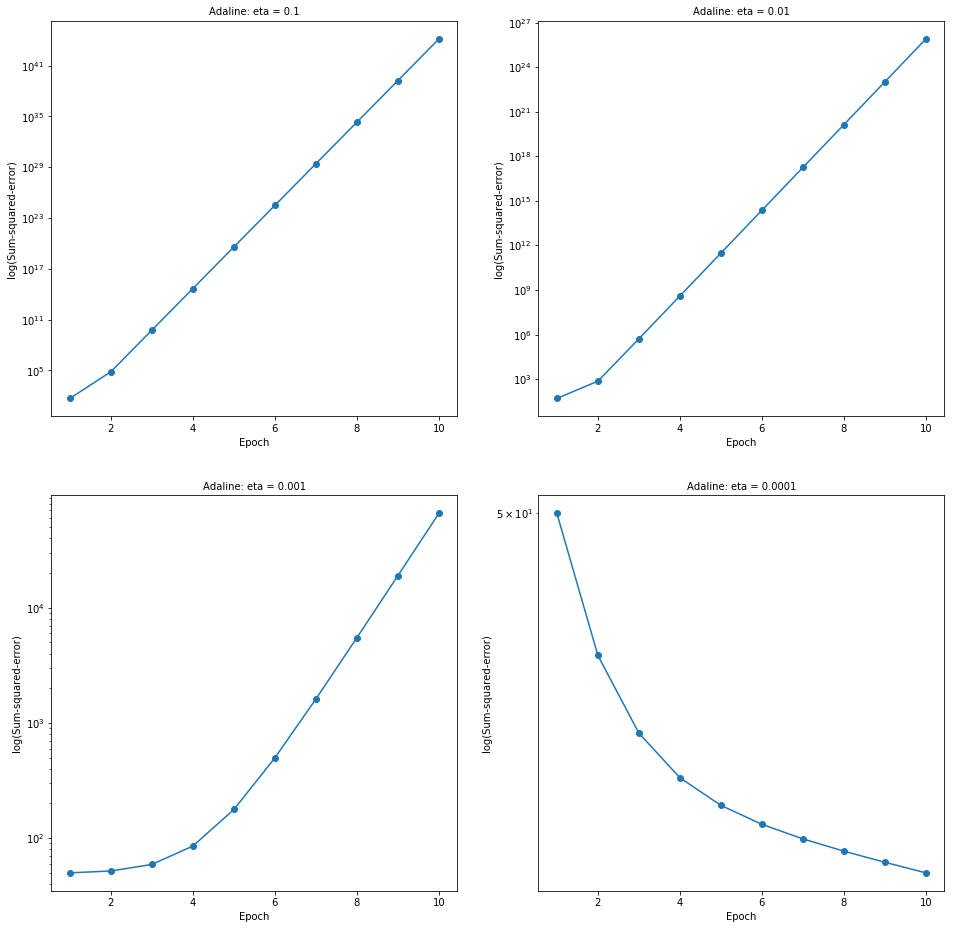

In [37]:
plot_adaline_eta(NF,NC)

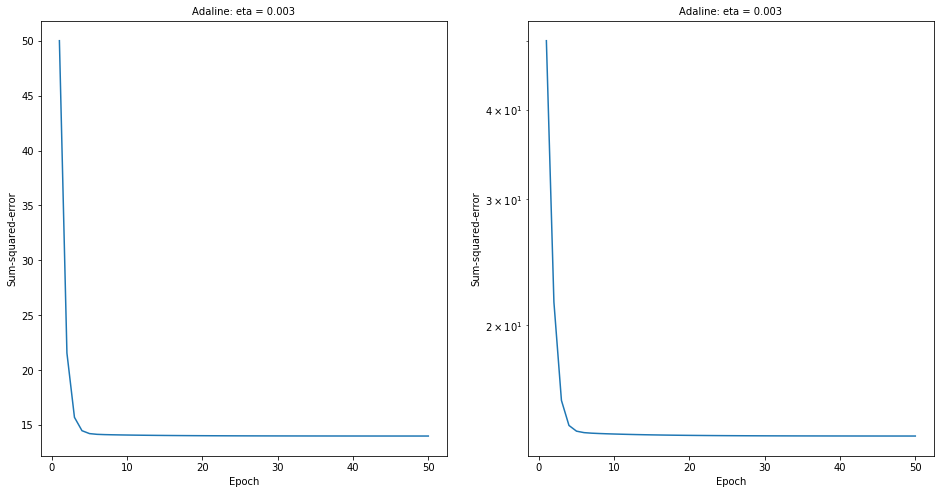

In [38]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,50)

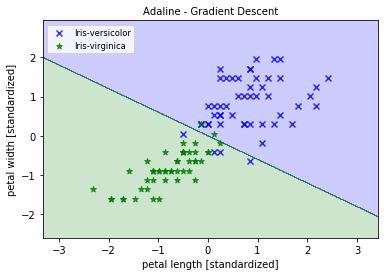

In [39]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [40]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.94


## Three Feature Cases

### sepal length (0), sepal width (1), and petal length (2)

In [41]:
# focus on the features "sepal length", "sepal width", and "petal length", feature indexes 0, 1, and 2
fdx = np.array([0,1,2])
# get class labels and features
NC, NF = get_class_labels_and_features()

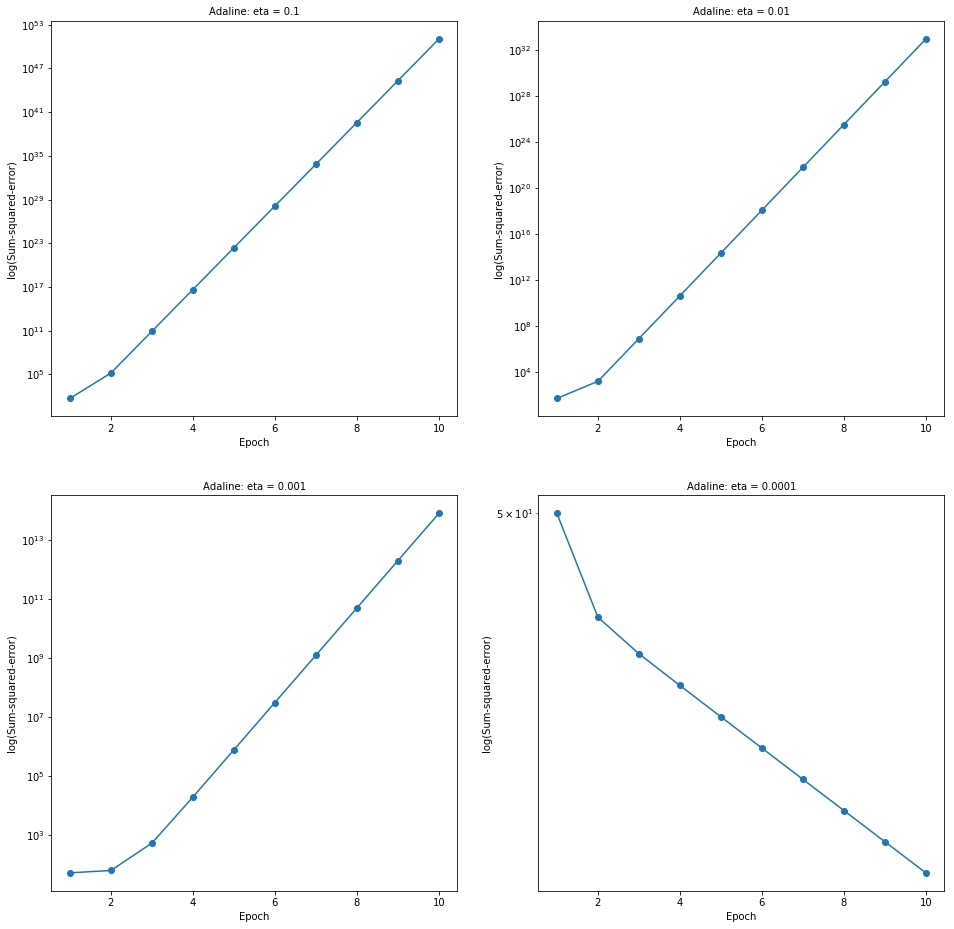

In [42]:
plot_adaline_eta(NF,NC)

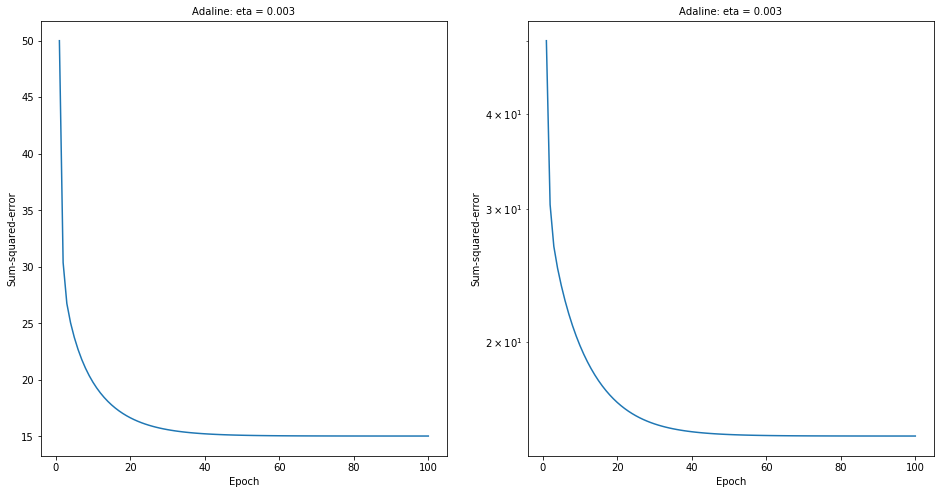

In [43]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,100)

In [44]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.9299999999999999


### sepal length (0), sepal width (1), and petal width (3)

In [45]:
# focus on the features "sepal length", "sepal width", and "petal width", feature indexes 0, 1, and 3
fdx = np.array([0,1,3])
# get class labels and features
NC, NF = get_class_labels_and_features()

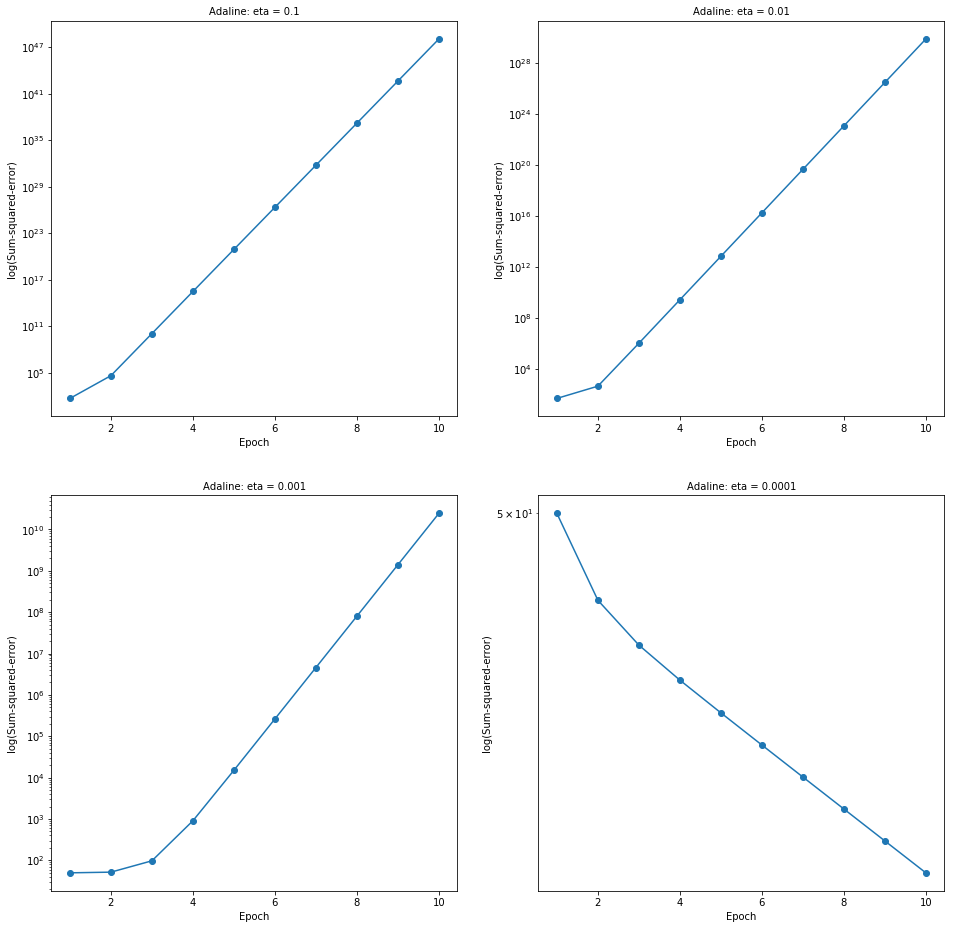

In [46]:
plot_adaline_eta(NF,NC)

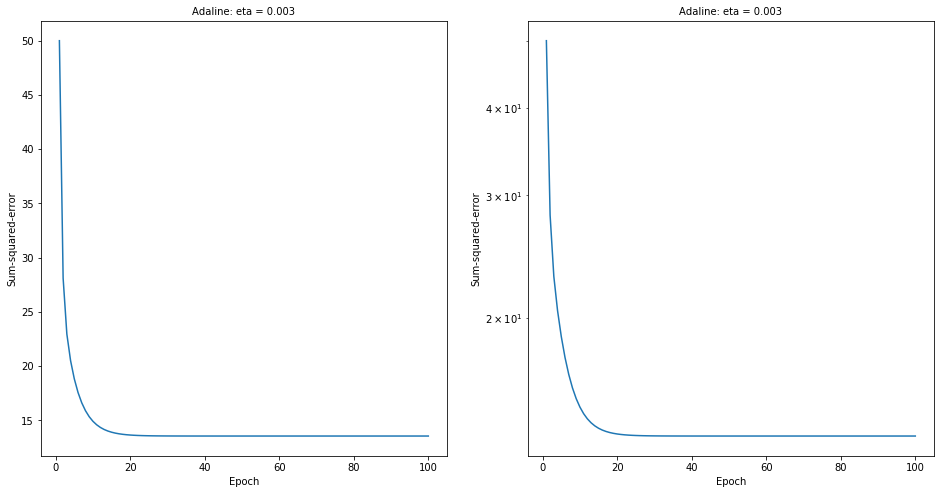

In [47]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,100)

In [48]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.95


### sepal length (0), petal length (2), and petal width (3)

In [49]:
# focus on the features "sepal length", "petal length", and "petal width", feature indexes 0, 2, and 3
fdx = np.array([0,2,3])
# get class labels and features
NC, NF = get_class_labels_and_features()

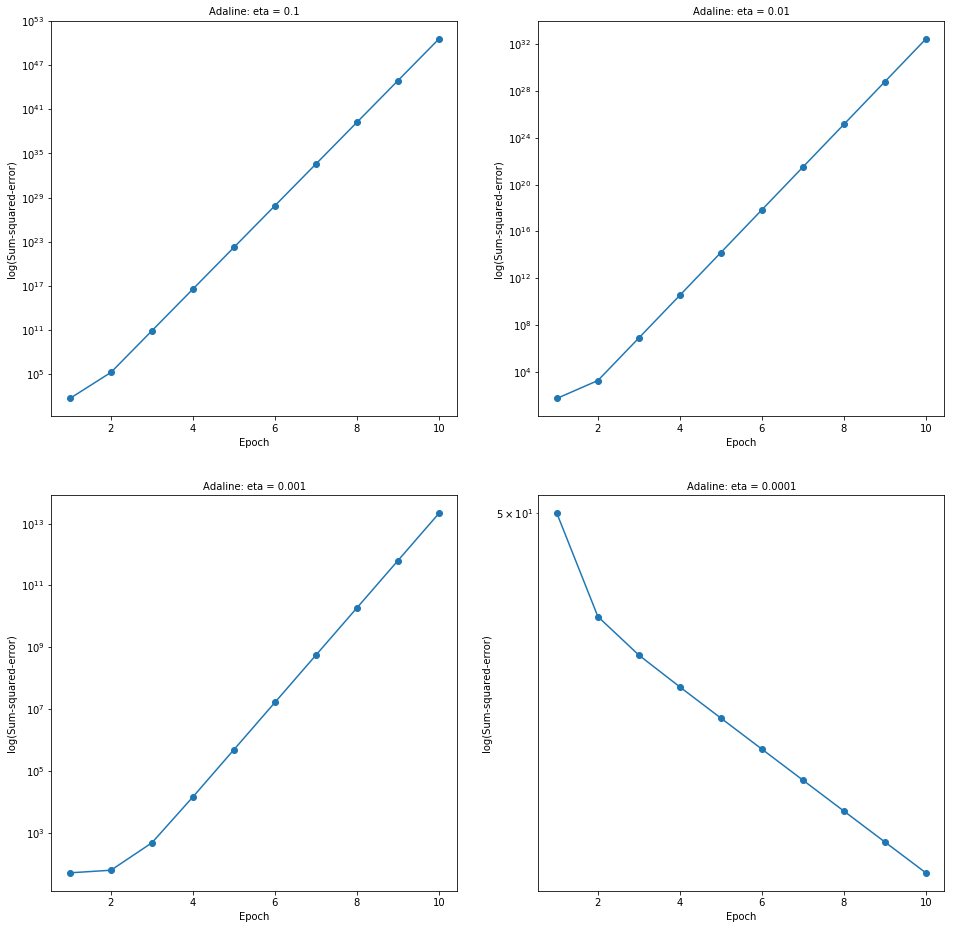

In [50]:
plot_adaline_eta(NF,NC)

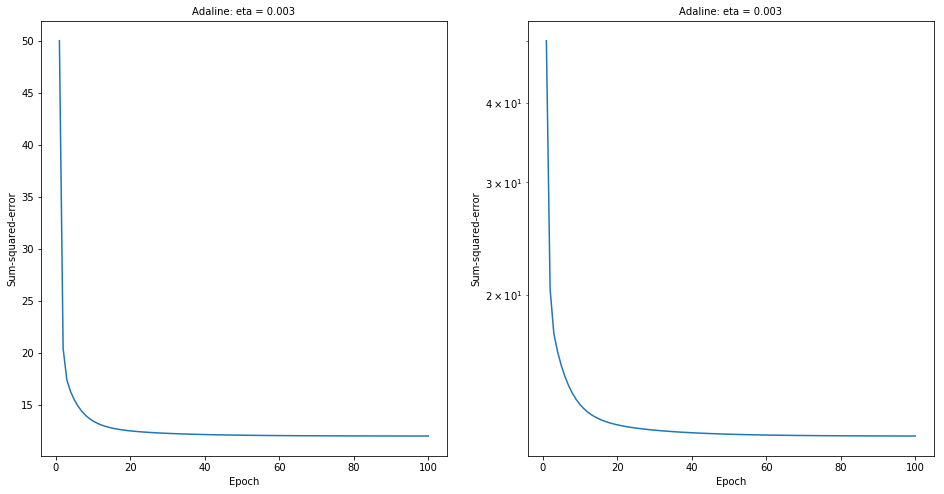

In [51]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,100)

In [52]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.97


### sepal width (1), petal length (2), and petal width (3)

In [53]:
# focus on the features "sepal width", "petal length", and "petal width", feature indexes 1, 2, and 3
fdx = np.array([1,2,3])
# get class labels and features
NC, NF = get_class_labels_and_features()

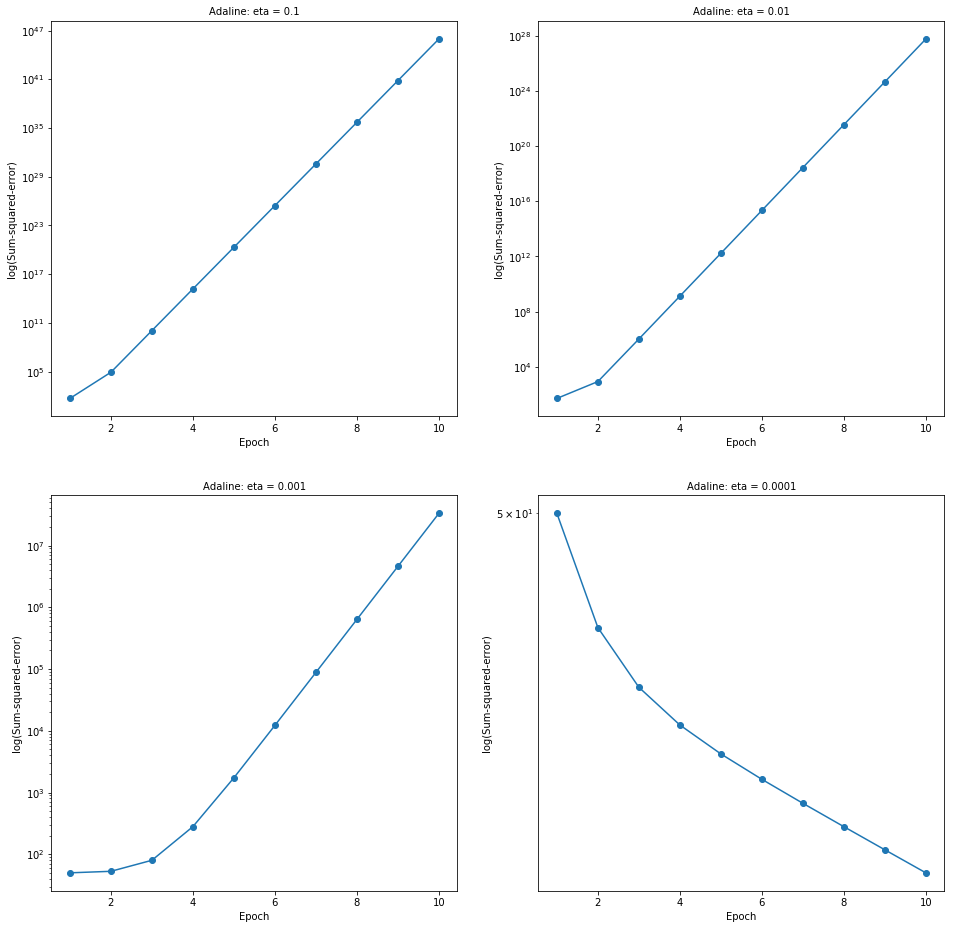

In [54]:
plot_adaline_eta(NF,NC)

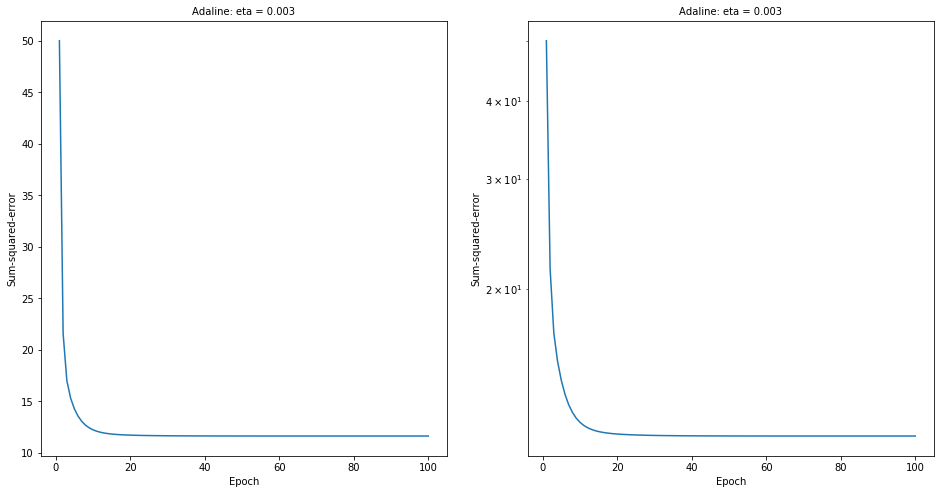

In [55]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,100)

In [56]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.96


## Four Feature Case

### sepal length (0), sepal width (1), petal length (2), and petal width (3)

In [57]:
# focus on all the features, feature indexes 0, 1, 2, 3
fdx = np.array([0,1,2,3])
# get class labels and features
NC, NF = get_class_labels_and_features()

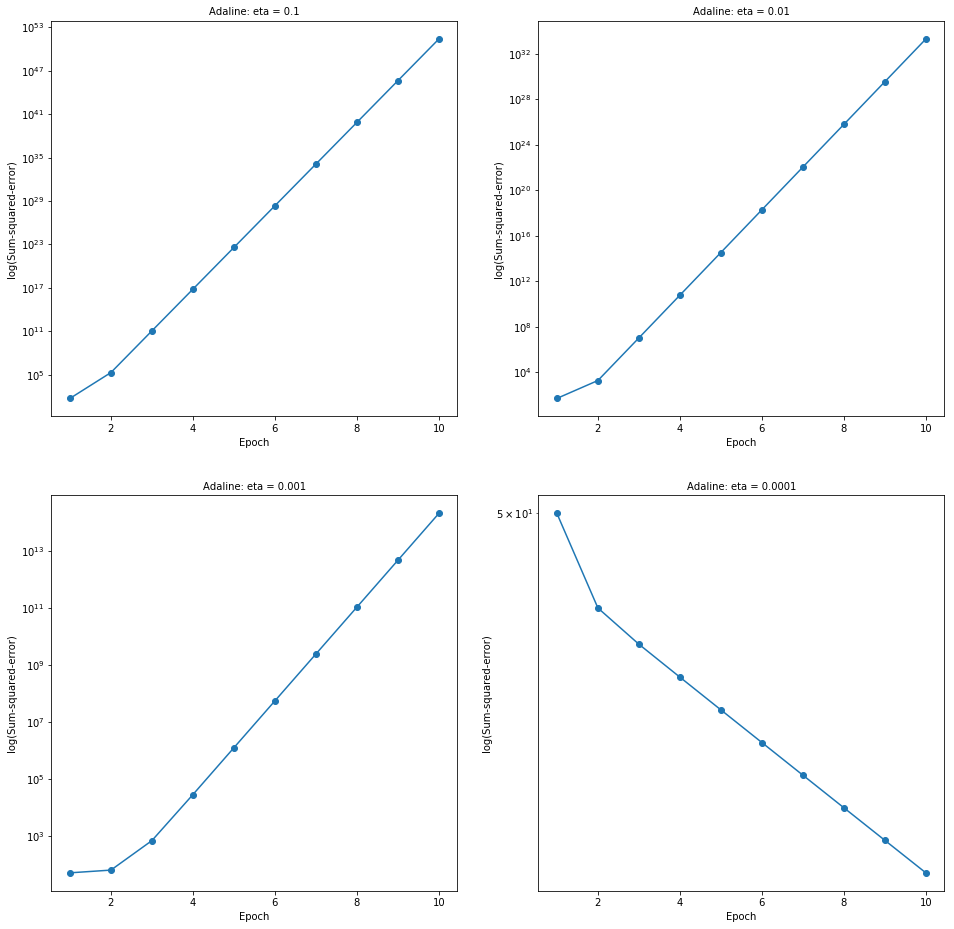

In [58]:
plot_adaline_eta(NF,NC)

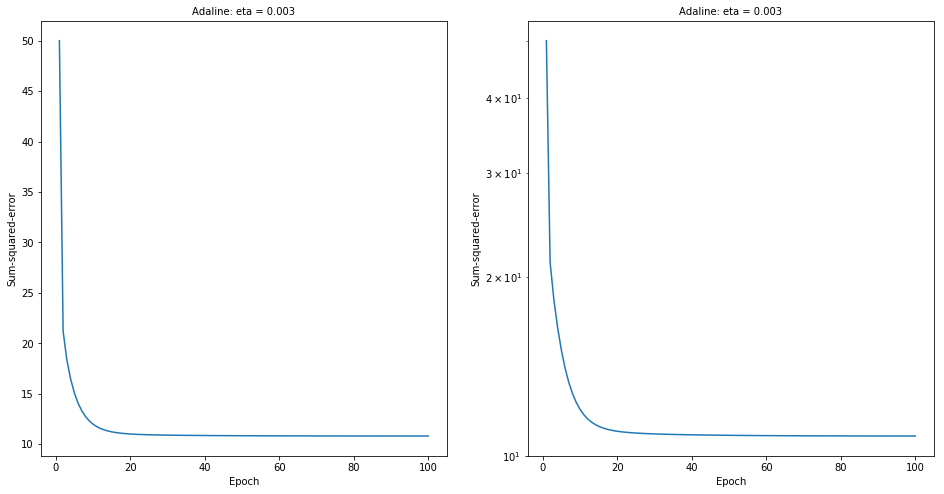

In [59]:
# standardize inputs
NF_Std = standardize_inputs(NF,NC)

ada = plot_adaline_eta_std(NF_Std,NC,100)

In [60]:
acc = ada.accuracy(NF_Std, NC)
casenum += 1
acclist.append([casenum,np.copy(fdx),round(acc,2)])
print(acc)

0.97


# Results

In [61]:
from prettytable import PrettyTable
table = PrettyTable(['Case Number','Features Used','Accuracy'])
for i in acclist:
    table.add_row(i)
print(table)

+-------------+---------------+----------+
| Case Number | Features Used | Accuracy |
+-------------+---------------+----------+
|      1      |     [0 1]     |   0.75   |
|      2      |     [0 2]     |   0.94   |
|      3      |     [0 3]     |   0.94   |
|      4      |     [1 2]     |   0.93   |
|      5      |     [1 3]     |   0.95   |
|      6      |     [2 3]     |   0.94   |
|      7      |    [0 1 2]    |   0.93   |
|      8      |    [0 1 3]    |   0.95   |
|      9      |    [0 2 3]    |   0.97   |
|      10     |    [1 2 3]    |   0.96   |
|      11     |   [0 1 2 3]   |   0.97   |
+-------------+---------------+----------+


In [62]:
print("Average Accuracy")

a = 0
for i in range(0,6):
    a += acclist[i][2]
a /= 6
print(f"Two features: {a}")

a = 0
for i in range(6,10):
    a += acclist[i][2]
a /= 4
print(f"Three features: {a}")
print(f"Four features: {acclist[10][2]}")

Average Accuracy
Two features: 0.9083333333333332
Three features: 0.9524999999999999
Four features: 0.97


# Discussion

In this assignment, we were given a dataset of the sepal and petal lengths and widths of 150 different Iris flowers. In that data set, the first 50 were from the setosa species, the next 50 were from the versicolor species, and the last 50 were from the virginica species. We had to train the Adaline model using the data for the versicolor and virginia species alongside all feature sets of size 2, 3, and 4. The following cases were used when training the Adaline model:

1. Two features at a time:
    * sepal length and sepal width
    * sepal length and petal length
    * sepal length and petal width
    * sepal width and petal length
    * sepal width and petal width
    * petal length and petal width
2. Three features at a time:
    * sepal length, sepal width, and petal length
    * sepal length, sepal width, and petal width
    * sepal length, petal length, and petal width
    * sepal width, petal length, and petal width
3. All four features together:
    * sepal length, sepal width, petal length, and petal width

After training the models, it can be seen that as the number of features used to train the model increases, so does the average accuracy. When using two features the average accuracy is 90.83%, when using three features the average accuracy is 95.25%, and when using all four features the accuracy is 97%. However, it is seen that when using sepal length and sepal width, the accuracy is 75%, which is much lower than all the other combinations of 2 features. It can also be seen that when using sepal length, petal length, and petal width, the accuracy is the same as using all the features together. Overall using more features will yeild more accurate results, albeit not by much. However, there are certain combinations of features that will yeild less accurate results than other combinations.